# Parkinson's Screening By Voiceprint Analysis
AI-5383  
L. Van Warren  
Assigned: Tuesday, February 23, 2021  
Prof. Mariofanna Milanova  
TA. Imran 'Md' Sarker  
University of Arkansas, Little Rock  

## Introduction - [Collection and Analysis of a Parkinson Dataset](https://bit.ly/3bFg455)  

This is a review of the paper whose subject is the title, and may be clicked to reference it. Unlike typical reviews this one is a living document, a Python Jupyter notebook, that allows its results and follow-on work to be executed by the reader. It can also be used as a reference template for similar machine learning investigations.  

This was an interesting paper for two reasons. It introduces the revolution that a degenerative disease, like Parkinson's, that plagues millions, can be telediagnosed by voiceprint. With later work it developed into an excellent comparative platform for six machine learning algorithms we will run below.  
 
Three of these algorithms had higher than high 95% accuracy we will see in the Results Section below.  
<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1Owj5YYbyd-dKZdvaXBD1UgtYh3ev6O-U' width='50%'/>
<figcaption class="figure-caption text-center"><h3>Figure 1: Results from Six Algorithms</h3></figcaption>
</center>
</figure>

![image](https://drive.google.com/uc?export=view&id=1Owj5YYbyd-dKZdvaXBD1UgtYh3ev6O-U)  

We will run all six of these in a moment.

The original work, and paper published from it, only used Support Vector Machines and K-Nearest Neighbors. 
However, it did not detail or discuss a portion of method, process and technology that enabled it to be so effective. This cleverness took place in two steps, the Speech Parsing Section and the Feature Extraction Section of the Data Collection flow shown here in a diagram, Figure 2, from the paper:  
![image](https://drive.google.com/uc?export=view&id=1McrZJ1iduvMTTsgYa8WSyCihKyhgsdLq)  
![image](https://drive.google.com/uc?export=view&id=1JJqVS79H3lGSO0-CiKeCbYHdRTQ78YtS)  

The speech parsing section was, a presumably manual, extraction of the sound waveforms representing specific utterances like the vowel 'o' and the word 'four' for each of the patients. The next stage feature extraction was much more significant. In order to produce and label the data provided it was necessary for them to transform the time-domain speech data into frequency-domain samples, and then label specific frequency bands in the data according that were most likely to correspond to patients who were negative and positive for the illness. The clue to this is in the waveform diagram, Figure 1 from the paper:  

![image](https://drive.google.com/uc?export=view&id=1CDI-hBz5LjCMruin64LqkVVz2E1KppNY)  
![image](https://drive.google.com/uc?export=view&id=1JJqVS79H3lGSO0-CiKeCbYHdRTQ78YtS)  

According to the paper, 'the speech is parsed to be split into voice samples, and time-frequency based features are extracted from the voice samples using Praat acoustic analysis software.' It was this specific feature extraction that enables the algorithm to work, and it may be that that portion of the algorithm is being held back as proprietary, but the high frequencies appearing in the bottom waveform are a clue that there are a cluster of frequencies that are diagnostic for Parkinson's and this is the first place that someone trying to reproduce the full experiment would start. 
These speech aspects are listed in the paper as telltale features of Parkinson's:
 - dysphonia (defective use of the voice),
 - hypophonia (reduced volume),
 - monotone (reduced pitch range),
 - dysarthria (difficulty with articulation of sounds or syllables)
Three of the four are frequency domain attributes and hypophonia is a time domain attribute that can also be acquired by the amplitude of the frequency domain bin contents. Here is a list of the features extracted in the paper, and this list is quickly examined by plotting a series of histograms from the supplied data to confirm plausible trends.  
  
![image](https://drive.google.com/uc?export=view&id=1wNsHJoJSnt297GE10veHSNg35r1uppP0)  
![image](https://drive.google.com/uc?export=view&id=1JJqVS79H3lGSO0-CiKeCbYHdRTQ78YtS)   

The data collected in the context of this study for the original study included:

 - 20 PWP (6 female, 14 male) and
 - 20 healthy individuals (10 female, 10 male)  
 
who appealed at the Department of Neurology in Cerrahpaşa School of Medicine, Istanbul University
Test group consists of patients who are suffering from PD for 0 to 6 years.

But inspection of the dataset showed that this number had grown from 40 subjects to 195. It is worth noting that in the larger dataset there are about 140 positive patients and 45 negative patients, so the data is unbalanced in that respect. This is noted in the code as well, and be computed exactly if desired. I did not have time to trace the pedigree of the additional data used in the analysis below, but it could be one reason that the accuracy went from 79% and 82% for k-NN and SVM with 40 subjects to 98% and 90% in the 195-subject case.

The Classification methods include:

 - Classification with Leave-One-Subject-Out (LOSO)
 - Classification with Summarized Leave-One-Out (s-LOO)

Evaluation Metrics:
The evaluation metrics are repeated from the paper because they are the bread-and-butter formulas of data science and it never hurts to review them. It also gives the author a chance to practice inserting LaTeX math formulas in Jupyter notebooks and getting them formatted correcly. The figures of merit for classifiers are:

 - Accuracy
 - Sensitivity
 - Specificity
 - MCC

Accuracy is the ratio of correctly classified instances to all instances:  
  
$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}  
$$
  
Where:
 - TP true positives
 - TN true negatives
 - FP false positives
 - FN false negatives  

Sensitivity and specificity are statistical measures of correctly classified positive and negative instances, respectively:
  
$$
sensitivity = \frac{TP}{TP + FN}  
$$
  
$$
specificity = \frac{TN}{TN + FP}  
$$

The Receiver Operating Characteristic (ROC) plots sensitivity vs. 1-specificity, but we will label the axes as TP vs. TN for brevity. These graphs are provided by real-time computation below.

Mathews Correlation Coefficient (MCC) is a measure that shows the quality of binary classification in machine learning. It is stable even if the class densities are considerably different. MCC is a correlation coefficient between the predicted and observed binary classifications and gets a value between –1 and +1. The formulation of MCC metric is given as follows:  

$$
MCC = \frac{TP\, \cdot \, TN - FP\, \cdot \, FN}{\sqrt[2]{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}  
$$

This coefficient gets the value of:
- +1 when the classifier makes perfect predictions,
- –1 when the predictions and actual values totally disagree, and
-  0 when the classification is no better than a random prediction.

# Libraries

In [1]:
import math
import os
import sys
import pandas            as pd 
import numpy             as np 
import matplotlib.pyplot as plt
import seaborn           as sea
import xgboost           as xgb
from scipy                   import interp
from scipy                   import stats
from cycler                  import cycler
from itertools               import cycle
from xgboost                 import XGBClassifier
from sklearn                 import datasets
from sklearn                 import metrics
from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_curve
from sklearn.metrics         import auc
from sklearn.metrics         import roc_auc_score
from sklearn.multiclass      import OneVsRestClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
%matplotlib inline

## Van Graphics Lib

In [2]:
# Extensions to matplotlib
# lvwarren@ualr.edu
# Tue Feb 23 17:16:12 CST 2021

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from cycler import cycler

van_color_list = ['#C83232', '#199619', '#0000FF',
                  '#009696', '#BB00BB', '#FFFF00',
                  '#000000', '#FFFFFF', '#808080']

def van_defaults(plot, x_size=10, y_size=10):

    # # My canonical graphing style
    # plt.xkcd()
    plot.figure(figsize=(x_size,y_size))
#   plot.rcParams['figure.figsize'] = [10, 10]
    plot.rcParams['figure.facecolor'] = 'FFFFFF'
    plot.rcParams.update({'font.size': 12})
    plot.rcParams['axes.facecolor'] = '#AADDAA'
    plot.rcParams['lines.linewidth'] = 3
    plot.rcParams['lines.color'] = 'red'
    plot.rcParams['axes.prop_cycle'] = cycler('color', van_color_list)
    plot.grid(True)

def van_labels(plot, x_label, y_label, title):
    plot.xlabel(x_label)
    plot.ylabel(y_label)
    plot.title(title)

def van_limits(plot, mx, px, my, py):
        plot.xlim((mx, px))
        plot.ylim((my, py))

# hidden by underscore because of singularity removal
def van_OoX(x):
    y = 1/x
    y[y >  math.pi] =  np.inf # remove singularity
    y[y < -math.pi] = -np.inf
    return(y)

def van_TaN(x):
    y = np.tan(x)
    y[y >  math.pi] =  np.inf # remove singularity
    y[y < -math.pi] = -np.inf
    return(y)


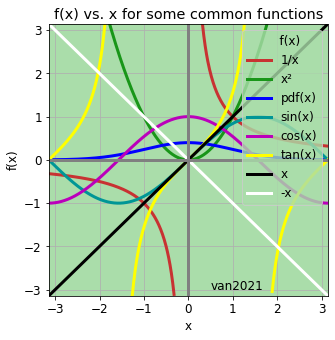

In [3]:
van_defaults(plt, 5, 5)
van_labels  (plt, 'x', 'f(x)', 'f(x) vs. x for some common functions')
van_limits  (plt, -math.pi, math.pi, -math.pi, math.pi)

x = np.arange(-math.pi, math.pi, 0.01)

function_list = [van_OoX(x), x*x, stats.norm.pdf(x) , np.sin(x) , np.cos(x), van_TaN(x) , x,  -x ]
function_name = [     '1/x','x²',          'pdf(x)' ,  'sin(x)',   'cos(x)',   'tan(x)','x','-x']

for y in function_list: plt.plot(x,y)
plt.axhline(0, color='#808080')
plt.axvline(0, color='#808080')
plt.text(0.5,-3,'van2021')
plt.legend(function_name, title='    f(x)', loc=1)
plt.show();

# Data Review

## Read Data

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
data = pd.read_csv('parkinsons.csv')
predictors = data.drop(['name'], axis = 1)
predictors = predictors.drop(['status'], axis = 1).to_numpy()
target = data['status']
data.shape

(195, 24)

## Textual Data Review
- Initially we take a look at the data to make sure the read has worked and that the numbers are plausible.
- We do a data.__head()__ call to look at the first 5 rows, and it also prints the data.__shape__.
- We inspect the _features_ by echoing the contents of the variable __target__ defined above.

In [6]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [7]:
target # Presumably labels for 'has Parkinsons' vs. doesn't.

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

## Graphical Data Review
- We can spot distribution shapes and trends
- Note in the last graphic we determine that this data is unbalanced with respect to Parkinson's Status!
- We plot first 16 columns, those after status are derivative statistics

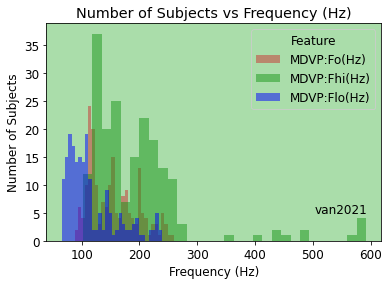

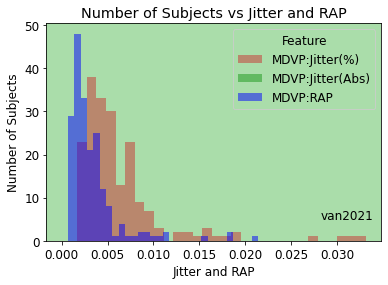

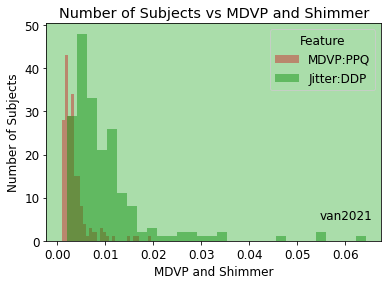

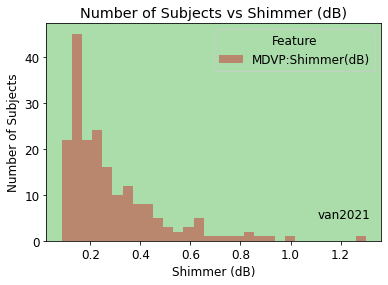

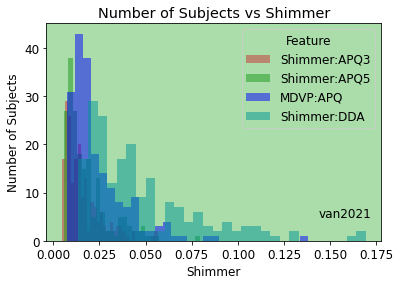

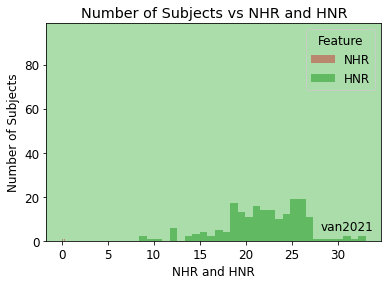

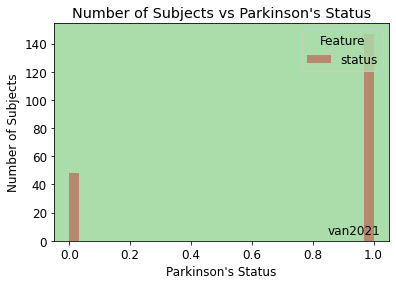

In [8]:
def park_plot(a, b, x_title=''):
    
    data_cols = range(a,b)
    y = [data.iloc[:,i+1] for i in data_cols]
    van_defaults(plt, x_size=6, y_size=4)
    van_labels(plt, x_title, 'Number of Subjects',
               'Number of Subjects vs ' + x_title)

    plt.text(0.85*np.max(y), 5,'van2021')

    [plt.hist(y[i], bins=30, alpha=0.50, label='foo') for i in range(0,b-a)]

    plt.legend(data.columns[np.add(data_cols, 1).tolist()],
               title='Feature', loc=1)
#   plt.axhline(0, color='#000000')
#   plt.axvline(0, color='#000000')
    plt.grid(False)
    plt.show();
    
park_plot(0,3, 'Frequency (Hz)')
park_plot(3,6, 'Jitter and RAP')
park_plot(6,8, 'MDVP and Shimmer')
park_plot(9,10, 'Shimmer (dB)')
park_plot(10,14, 'Shimmer')
park_plot(14,16, 'NHR and HNR')
park_plot(16,17, 'Parkinson\'s Status')

# Analysis Using Six Different Models

## Scale to Unit Interval and Test/Train Data Split
- Every modeling technique uses scaled version of the data
- Imports sklearn.preprocessing MinMaxScaler
- Remember you have both scaled and inverse transforms available for forward and inverse maps

In [9]:
import warnings
warnings.filterwarnings('ignore') # ignore superfluous warning

scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(predictors)
Y = target

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y,test_size = .25, random_state = 7)

## Four Utility Functions
- plot_confusion_matrix: a function's name that tells you what it does saves  
  unnecessary comments!
- summarize_model_fit: calls plot_confusion_matrix()
- plot_ROC: plot the Receiver Operating Characteristic curve of  
  True Positives vs. False Positives
- fit_predict_summarize: do the fit, make the predictions, call  
  summarize_model_fit() to assess the result

In [10]:
def plot_confusion_matrix(CM):
    group_names  = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) \
                    for value in CM.flatten()]
    group_percents = ['{0:.2%}'.format(value) \
                      for value in CM.flatten()/np.sum(CM)]
    labels = [f'{v1}\n{v2}\n{v3}' \
              for v1, v2, v3 in zip(group_names,group_counts,group_percents)]
    labels = np.asarray(labels).reshape(2,2)
    # plt.figure()
    van_defaults(plt, x_size=4.5, y_size=4.5)
    sea.heatmap(CM, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
def summarize_model_fit(title, test, pred):
    print(f'{title} Model Accuracy: \
    {round(metrics.accuracy_score(test, pred)*100,1)}%')
#   print(metrics.classification_report(test, pred))
    print('Confusion Matrix: ')
    plot_confusion_matrix(metrics.confusion_matrix(test, pred))
    
def plot_ROC(name, Y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred) 
    van_defaults(plt, x_size=3.75, y_size=3.75)
    van_labels(plt, 'False Positive Rate',
                    'True  Positive Rate', 
                    'Receiver Operating Characteristic')
    plt.plot(fpr,tpr) # ROC curve
    ident = [0.0, 1.0]
    plt.plot(ident,ident)
    auc = np.trapz(tpr,fpr) # compute the area using trapezoidal rule
    plt.legend([round(auc,2)], title='AUC', loc=4)
    plt.text(0.9, -0.30,'van2021', fontsize=10)
    plt.text(0.1,  0.90 , name, fontsize=12)
    plt.show()
    
def fit_predict_summarize(model, name, X_train_, Y_train_, X_test_, Y_test_):
    model.fit(X_train_, Y_train_)
    y_pred_ = model.predict(X_test_)
    summarize_model_fit(name , Y_test_, y_pred_)
    plot_ROC(name, Y_test_, y_pred_)


## Six Standard Models and Results
- XG Boost Classifier - 98%
- Logistic Regression - 88%
- Gaussian Naive Bayes - 69%
- K-Nearest Neighbor - 98%
- Support Vector Machine - 90%
- Classification and Regression Trees - 96%

Note that these analyses all take similar form of fit, predict and summarize.

## Use Function Dictionary to Invoke Models


In [11]:
# Note to Self: Use Dictionary as Function Dispatcher, so Pythonic!
model_dict = {
              'XG Boost Classifier'    : XGBClassifier(eval_metric='logloss'),
              'Logistic Regression'    : LogisticRegression(),
              'Gaussian Naive Bayes'   : GaussianNB(),
              'K-Nearest-Neigbhors'    : KNeighborsClassifier(),
              'Support Vector Machine' : SVC(),
              'Decision Trees'         : DecisionTreeClassifier()
             }


## Detailed Results Confusion Matrices and ROC Plots

XG Boost Classifier Model Accuracy:     98.0%
Confusion Matrix: 


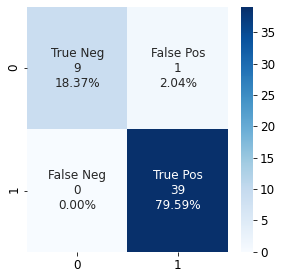

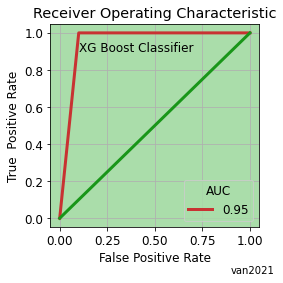

Logistic Regression Model Accuracy:     87.8%
Confusion Matrix: 


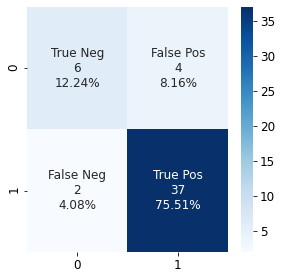

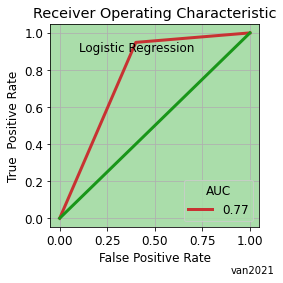

Gaussian Naive Bayes Model Accuracy:     69.4%
Confusion Matrix: 


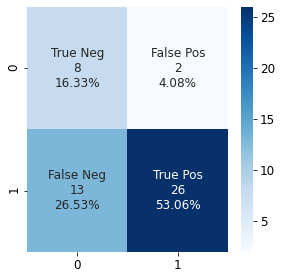

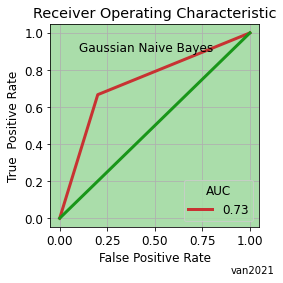

K-Nearest-Neigbhors Model Accuracy:     98.0%
Confusion Matrix: 


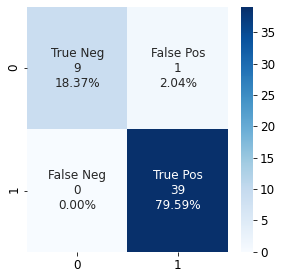

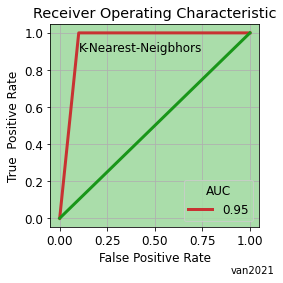

Support Vector Machine Model Accuracy:     89.8%
Confusion Matrix: 


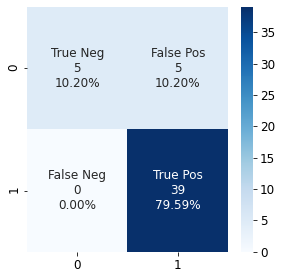

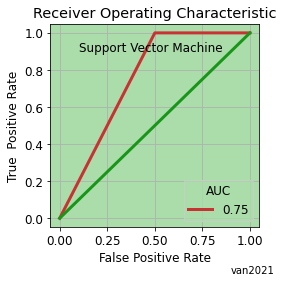

Decision Trees Model Accuracy:     95.9%
Confusion Matrix: 


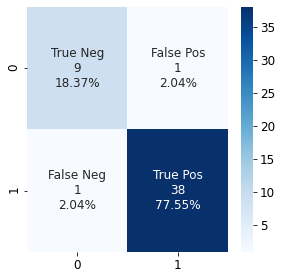

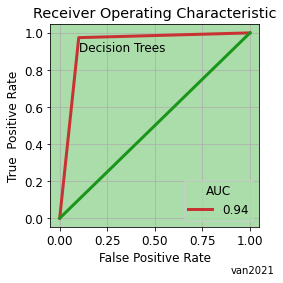

In [12]:
for name, model in model_dict.items():
    fit_predict_summarize(model, name, X_train, Y_train, X_test, Y_test)

### References

- [Original Parkinson Speech Paper](http://bit.ly/3bFg455)
- [Parkinson Data](https://raw.githubusercontent.com/shlokKh/Parkinsons-Voice-Detection/master/parkinsons.data)
- [Parkinson Data Python](https://github.com/shlokKh/Parkinsons-Voice-Detection/blob/master/parkinsonsdata.py)
- [Parkinson Voice Data](https://github.com/shlokKh/Parkinsons-Voice-Detection)
- [Python Dictionary Comprehension](https://www.datacamp.com/community/tutorials/python-dictionary-comprehension)
- [Storing Function in Python Dictionary](https://softwareengineering.stackexchange.com/questions/182093/why-store-a-function-inside-a-python-dictionary)
- [Hide Warnings in Python](https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython)
- [ROC Plots](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
- [Numpy max for list of lists](https://stackoverflow.com/questions/33269530/get-max-value-from-a-list-with-lists)
- [Adorn Histogram Text](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.hist.html)
- [Add Two Lists Element-Wise](https://stackoverflow.com/questions/18713321/element-wise-addition-of-2-lists)
- [Mac pbcopy trick](https://coderwall.com/p/osbzzq/copy-files-to-clipboard-using-command-line-on-osx)
- [Panda Dataframe Column Names](https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/)
- [Python Lists](https://www.tutorialspoint.com/python3/python_lists.htm)
- [More Python Lists](https://www.programiz.com/python-programming/list)
- [Pandas Dataframe Row and Column Selection](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)
- [Pandas Dataframe First Column](https://www.kite.com/python/answers/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series-in-python)
- [Dataframe as_matrix Deprecation](https://stackoverflow.com/questions/61102281/dataframe-object-has-no-attribute-as-matrix)
- [XGBoost Introduction](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machinelearning)
- [K Nearest Neighbors Algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Logistic Regression](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
- [Logistic Regression Sklearn](https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [K Nearst Neighbors Classifier](https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.htm)
- [Print Key Value Dictionary Pairs](https://stackoverflow.com/questions/26660654/how-do-i-print-the-key-value-pairs-of-a-dictionary-in-python)
- [Insert an Inline Image Into Google Colab](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive/62337161#62337161)
- [Plain HTML instead of markdown for Jupyter Image Insertion](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive/62337161#62337161)
- [Load CSV Files Into Google Colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

### Acknowledgements

This project extensively modifies code from a University of Maryland Research Project by:
[Shlok Khandelwal](https://github.com/shlokKh/Parkinsons-Voice-Detection/blob/master/parkinsonsdata.py) and
[Elcin Ergin, Shu Hayakawa, and Timardeep Kaur](https://github.com/hayakshu/Classification-Analysis-Of-Parkinson-Speech-Dataset)  
It utilizes a confusion matrix pretty printer by
[Dennis T](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)    
Code Repository by [Shlok Khandelwal on Github](https://github.com/shlokKh)